<a href="https://colab.research.google.com/github/Rezzz01/Worksheets_AI/blob/main/Workshop_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("bank.csv")

# (a) Columns with dtype = object
object_cols = df.select_dtypes(include='object').columns
print("Columns with dtype=object:")
print(object_cols)

# (b) Unique values of those object columns
print("\nUnique values in object columns:")
for col in object_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())

# (c) Total number of null values in each column
print("\nNull values per column:")
print(df.isnull().sum())

# 3. Drop all object columns and save new DataFrame
df_numeric = df.drop(columns=object_cols)

# Save it as banknumericdata.csv
df_numeric.to_csv("banknumericdata.csv", index=False)
print("\nNumeric DataFrame saved as 'banknumericdata.csv'")

# 4. Read the new CSV and show summary statistics
df_numeric_loaded = pd.read_csv("banknumericdata.csv")
print("\nSummary statistics:")
print(df_numeric_loaded.describe())


Columns with dtype=object:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'poutcome', 'y'],
      dtype='object')

Unique values in object columns:

Column: job
['unknown' 'management' 'services' 'technician' 'retired' 'admin.'
 'blue-collar' nan]

Column: marital
['single' 'divorced' 'married']

Column: education
['tertiary' 'primary' 'unknown' 'secondary']

Column: default
['yes' 'no']

Column: housing
['no' 'yes']

Column: loan
['no' 'yes']

Column: month
['may' 'sep' 'dec' 'jun' 'oct' 'aug' 'jul' 'apr' 'mar' 'feb' 'nov' 'jan']

Column: poutcome
['unknown' 'failure' 'success']

Column: y
['no' 'yes']

Null values per column:
age          5
job          5
marital      0
education    0
default      0
balance      5
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Numeric DataFrame saved as 'banknumericdata.csv'

Summary statistics:
   

In [ ]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv("medical_student.csv")

# 2. Check info and identify columns with missing values
print("Dataset Info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

# 3. Impute missing values

for col in df.columns:
    if df[col].isnull().sum() > 0:

        if pd.api.types.is_numeric_dtype(df[col]):

            df[col].fillna(df[col].median(), inplace=True)
            print(f"Filled missing values in numeric column '{col}' using MEDIAN.")

        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
            print(f"Filled missing values in categorical column '{col}' using MODE.")

# 4. Check for duplicate rows and remove them
duplicate_count = df.duplicated().sum()
print(f"\nTotal duplicate rows found: {duplicate_count}")

if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")

print("\nFinal missing values per column:")
print(df.isnull().sum())

print("\nFinal DataFrame shape:", df.shape)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student_ID          504 non-null    object 
 1   Age                 504 non-null    float64
 2   Specialization      494 non-null    object 
 3   Study_Hours_Weekly  484 non-null    float64
 4   GPA                 489 non-null    float64
 5   Exam_Score          504 non-null    float64
dtypes: float64(4), object(2)
memory usage: 23.8+ KB
None

Missing values per column:
Student_ID             0
Age                    0
Specialization        10
Study_Hours_Weekly    20
GPA                   15
Exam_Score             0
dtype: int64
Filled missing values in categorical column 'Specialization' using MODE.
Filled missing values in numeric column 'Study_Hours_Weekly' using MEDIAN.
Filled missing values in numeric column 'GPA' using MEDIAN.

Total duplicate rows found: 4
Du

/tmp/ipython-input-3404965096.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-3404965096.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("titanic.csv")

# Subset columns
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Filter for first-class passengers
first_class = subset_df[subset_df['Pclass'] == 1]

# Calculate statistics for Fare
mean_fare = first_class['Fare'].mean()
median_fare = first_class['Fare'].median()
max_fare = first_class['Fare'].max()
min_fare = first_class['Fare'].min()

print("Mean Fare:", mean_fare)
print("Median Fare:", median_fare)
print("Maximum Fare:", max_fare)
print("Minimum Fare:", min_fare)


Mean Fare: 81.39355481063092
Median Fare: 79.94571769604072
Maximum Fare: 217.96396507367024
Minimum Fare: 10.0


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("titanic.csv")

# Subset the columns first
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Count null values in Age
null_age = subset_df['Age'].isnull().sum()
print("Null values in Age column:", null_age)

# Drop rows where Age is null
subset_df_clean = subset_df.dropna(subset=['Age'])
print("Shape after dropping Age nulls:", subset_df_clean.shape)


Null values in Age column: 90
Shape after dropping Age nulls: (801, 6)


Mean Survival Rate by Gender:
Sex
female    0.301948
male      0.387650
Name: Survived, dtype: float64


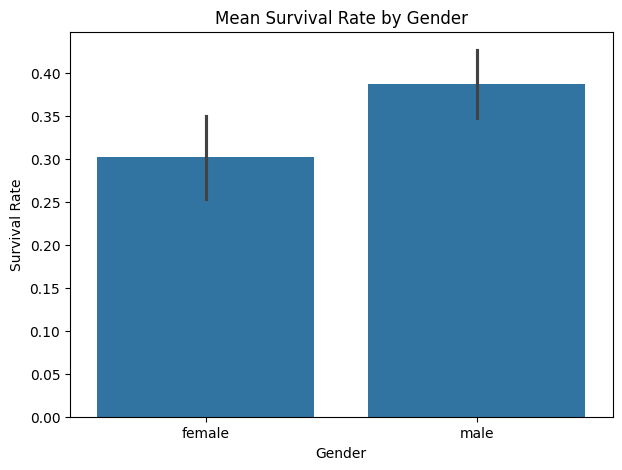

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("titanic.csv")

# Calculate mean survival by gender
mean_survival = df.groupby('Sex')['Survived'].mean()
print("Mean Survival Rate by Gender:")
print(mean_survival)

plt.figure(figsize=(7,5))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Mean Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.show()
